In [1]:
import os, sys
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.insert(0, parent_dir)
curr_dir, parent_dir


('/home/am/Documents/Software Development/10_Academy Training/week-10/brent-data-analysis/notebooks',
 '/home/am/Documents/Software Development/10_Academy Training/week-10/brent-data-analysis')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
processed_data_path = "../data/BrentOilPrices.csv"

In [5]:
df_processed = pd.read_csv(processed_data_path)

In [6]:
df_processed.shape

(5015, 2)

In [7]:
from scripts.statistical_modeling import StatisticalModel

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
statistical_model = StatisticalModel(df_processed)


**********************************************************************

Checking for stationarity using ADF test.
ADF Statistic: -2.0440650928526902, 
p-value: 0.26759235678521454

**********************************************************************

Plotting ACF and PACF to determine AR and MA orders.


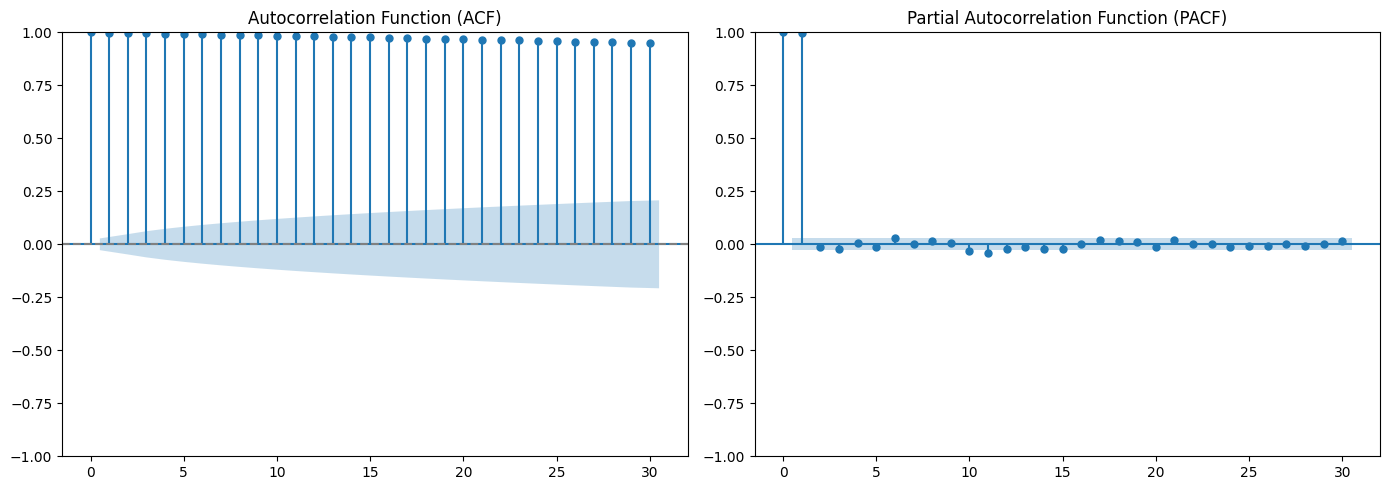


**********************************************************************

Fitting ARIMA model.

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5015
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9610.184
Date:                Fri, 21 Feb 2025   AIC                          19226.367
Time:                        17:21:49   BIC                          19245.927
Sample:                             0   HQIC                         19233.222
                               - 5015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4109      0.309      1.329      0.184      -0.195       1.017
ma.L1         -0.3915      0.313    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Performing Bayesian analysis using PYMC completed!

----------------------------------------------------------------------


Posterior Summary:
<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    mu       (chain, draw) float64 59.41 59.06 58.71 60.07 ... 59.58 59.3 59.29
    sigma    (chain, draw) float64 33.46 32.97 32.91 32.91 ... 33.04 32.87 32.64
Attributes:
    created_at:                 2025-02-21T14:21:59.792449
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.6.1
    sampling_time:              4.88363242149353
    tuning_steps:               1000
         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     59.358  0.468  58.422   60.178      0.010    0.007    2047.0    1377.0   
sigma  32.964  0.341  32.274   33.557      0.008    0.006    1836.0  

In [9]:
result = statistical_model.check_stationarity()
adf_statistic = result['ADF Statistic']
p_value = result['p-value']
print(f"ADF Statistic: {adf_statistic}, \np-value: {p_value}")

statistical_model.plot_acf_pacf()

statistical_model.fit_arima()

statistical_model.fit_garch()

trace = statistical_model.bayesian_inference()